In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


import pandas as pd
pd.set_option("display.width", 150)
pd.set_option("display.max_colwidth", 15)
import requests
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path 

In [2]:
df = pd.read_csv("chrisalbon_mlflashcards.csv")
df['text'].fillna('', inplace=True)

In [3]:
pd.set_option("display.max_colwidth", 15)
print(df.tail())

                 id  likes  replies  retweets            text       timestamp             url         img_url
236  94607825069...     19        1         0     Bayes Error  2017-12-27T...  https://twi...  https://pbs...
237  94575108497...     47        3        13    Occams Razor  2017-12-26T...  https://twi...  https://pbs...
238  94571793723...      8        0         1  K-Fold Cros...  2017-12-26T...  https://twi...  https://pbs...
239  94538342129...     18        1         1         Extrema  2017-12-25T...  https://twi...  https://pbs...
240  94536381783...     34        1         7  Softmax Act...  2017-12-25T...  https://twi...  https://pbs...


In [4]:
df.count(axis=0)

id           241
likes        241
replies      241
retweets     241
text         241
timestamp    241
url          241
img_url      237
dtype: int64

In [5]:
pd.set_option("display.max_colwidth", 25)
print(df[df.img_url.isnull()])

                     id  likes  replies  retweets text            timestamp                       url img_url
83   930450506744414208     52        3         0       2017-11-14T15:01:02  https://twitter.com/c...     NaN
193  902952380160892928      1        0         0       2017-08-30T17:53:18  https://twitter.com/c...     NaN
198  901323838675337216      0        1         0       2017-08-26T06:02:03  https://twitter.com/c...     NaN
226  948412638148444160      3        0         0       2018-01-03T04:36:08  https://twitter.com/c...     NaN


In [6]:
df = df.dropna(subset=['img_url'])

In [7]:
df.count(axis=0)

id           237
likes        237
replies      237
retweets     237
text         237
timestamp    237
url          237
img_url      237
dtype: int64

In [8]:
df.dtypes

id            int64
likes         int64
replies       int64
retweets      int64
text         object
timestamp    object
url          object
img_url      object
dtype: object

In [9]:
df.timestamp = pd.to_datetime(df.timestamp, infer_datetime_format=True)
df.dtypes

id                    int64
likes                 int64
replies               int64
retweets              int64
text                 object
timestamp    datetime64[ns]
url                  object
img_url              object
dtype: object

In [10]:
def get_image_name(id, text, img_url):
    res = str(id)
    if text:
        res = res + "_" + text.replace(" ", "_")
    try:
        extn = Path(img_url).suffix
    except:
        print(id, text, img_url)
    res = res + extn
    return res

# test
index = 232
img_url = df.iloc[index].img_url
id = df.iloc[index].id
text = df.iloc[index].text
img_name = get_image_name(id, text, img_url)
print(img_name)

946078250698018816_Bayes_Error.png


In [11]:
img_names = []
for index, row in df.iterrows():
    img_name = get_image_name(row.id, row.text, row.img_url)
    img_names.append(img_name)
df['img_name'] = img_names

In [12]:
pd.set_option("display.max_colwidth", 45)
print(df.tail()[['id', 'text', 'img_name']])

                     id                         text                                      img_name
236  946078250698018816                  Bayes Error            946078250698018816_Bayes_Error.png
237  945751084974333952                 Occams Razor           945751084974333952_Occams_Razor.png
238  945717937234591744      K-Fold Cross-Validation  945717937234591744_K-Fold_Cross-Validatio...
239  945383421299191808                      Extrema                945383421299191808_Extrema.png
240  945363817839566849  Softmax Activation Function  945363817839566849_Softmax_Activation_Fun...


In [13]:
def download_image(img_url, img_name):
    img_data = requests.get(img_url).content
    with open(img_name, 'wb') as handler:
        handler.write(img_data)
    return img_name

# test
downloaded_img = download_image(img_url, img_name)
print(downloaded_img)

945363817839566849_Softmax_Activation_Function.png


In [20]:
## download all images
n = len(df)
for index, row in df.iterrows():
    try:
        img_name = row.img_name
        img_url = row.img_url
        print(f"processing img {index + 1}/{n}", img_name, img_url)
        download_image(img_url, img_name)      
    except Exception as inst:
        print("Error", index, inst, img_name, img_url)

processing img 1/237 892802102702911488.jpg https://pbs.twimg.com/media/DGPcXPAVwAAfbqV.jpg
processing img 2/237 961698946698567680_Threshold_Activation.png https://pbs.twimg.com/media/DVikGEhUQAAIkzD.png
processing img 3/237 961666291189743616_Chi-Squared.png https://pbs.twimg.com/media/DViGZR3VoAAAoNf.png
processing img 4/237 961337263299821568_MinMax_Scaling.png https://pbs.twimg.com/media/DVdbJVIU0AEQcMg.png
processing img 5/237 961302907969654784_Probability_Density_Function.png https://pbs.twimg.com/media/DVc75mvU8AA23En.png
processing img 6/237 960977759915851776_Alpha_In_Ridge_Regression.png https://pbs.twimg.com/media/DVYULevV4AAGJCd.png
processing img 7/237 960949706053468160_Greek_Letters_3.png https://pbs.twimg.com/media/DVX6qiMU8AAlr2V.png
processing img 8/237 960604174969745408_Variance_Inflation_Factor.png https://pbs.twimg.com/media/DVTAZ-PUQAAI3mS.png
processing img 9/237 960573424891412480_Variance.png https://pbs.twimg.com/media/DVSkcGRV4AA6Ao1.png
processing img 10/

In [21]:
# check date range of tweets
min_date = df.timestamp.min()
max_date = df.timestamp.max()
print(min_date, max_date)

2017-08-02 17:39:43 2018-02-08 20:31:11


In [22]:
# top 5 liked and retweeted tweets
cols = ['likes', 'replies', 'retweets', 'timestamp', 'text']
df_top5 = df.sort_values(by=['likes', 'retweets'], ascending=[False, False])[:5]
print(df_top5[cols])

     likes  replies  retweets           timestamp                                          text
207   1815       74       700 2017-08-22 13:06:13                                              
21      99        4        43 2017-10-26 19:25:53                              Simpsons Paradox
148     73        8        13 2017-12-22 18:21:54                                       Tensors
67      65        4        18 2017-11-23 20:51:11                                         Big O
217     65        2         6 2018-01-09 18:32:45  Normalized Initialization Of Neural Netwo...


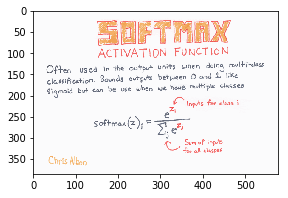

In [23]:
def plot_img(img_name, size=(5, 3)):
    plt.figure(figsize=size)
    img = mpimg.imread(img_name)
    plt.imshow(img) 
    
# test
plot_img(img_name)

In [24]:
def plot_images(img_names, titles, size=(20, 10), columns=5):
    plt.figure(figsize=size)
    #print(img_names)
    for i, img_name in enumerate(img_names):
        image = mpimg.imread(img_name)
        plt.subplot(len(img_names) / columns + 1, columns, i + 1)
        plt.title(titles[i][:25])
        plt.xticks([])
        plt.yticks([])
        plt.imshow(image)

In [18]:
print(df_top5[cols])
plot_images(df_top5.img_name.values, df_top5.text.values)

     likes  replies  retweets           timestamp                                          text
207   1815       74       700 2017-08-22 13:06:13                                              
21      99        4        43 2017-10-26 19:25:53                              Simpsons Paradox
148     73        8        13 2017-12-22 18:21:54                                       Tensors
67      65        4        18 2017-11-23 20:51:11                                         Big O
217     65        2         6 2018-01-09 18:32:45  Normalized Initialization Of Neural Netwo...


FileNotFoundError: [Errno 2] No such file or directory: '899981031150727168.jpg'

     likes  replies  retweets           timestamp text
0        1        0         1 2017-08-02 17:39:43     
208     17        0         2 2017-08-21 20:13:16     
206     19        0         7 2017-08-22 17:33:19     
205     18        0         7 2017-08-22 19:34:29     
204     24        1         9 2017-08-23 17:41:59     


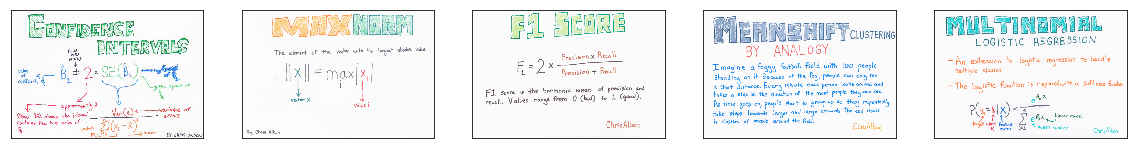

In [55]:
# top 5 oldest tweets
# wanted to check if more interesting topics are covering in the begining to start with
df_top5 = df.sort_values(by=['timestamp'], ascending=[True])[:5]
print(df_top5[cols])
plot_images(df_top5.img_name.values, df_top5.text.values)

In [39]:
# drop outlier
df.drop(207, inplace=True)

/home/tutysara/anaconda2/envs/fastai/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


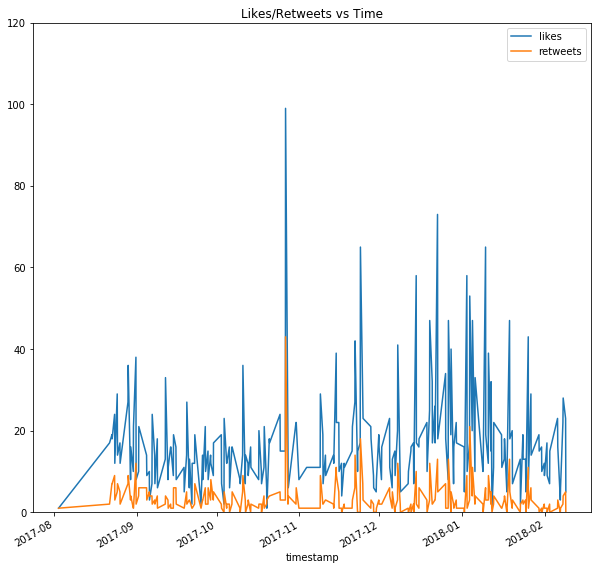

In [41]:
# check if oldest tweets are best
title = "Likes/Retweets vs Time"
df.plot(x='timestamp', y=['likes', 'retweets'],  kind='line', ylim=(0,120), figsize=(10,10), title=title, subplots=False)

In [ ]:
#Recent tweets are gaining more traction

In [42]:
# find above average tweets
likes_avg = df.likes.mean()
print(likes_avg)
df_above_average_liked = df[df.likes > likes_avg]

17.199152542372882


In [62]:
df_above_average_liked.shape[0]
# this is a big number, find something managable < 50

81

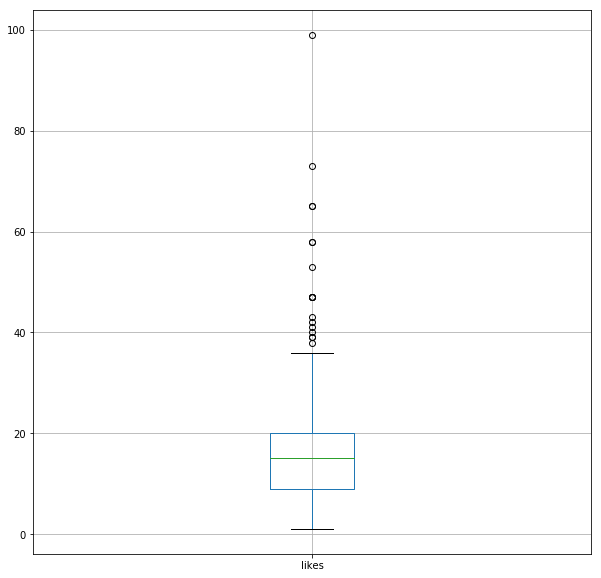

In [44]:
df.boxplot(column="likes", figsize=(10,10))

In [ ]:
# we see there are many outliers

In [45]:
likes_80 = df.likes.quantile(0.80)

In [46]:
df_likes_80 = df[df.likes > likes_80]
print(df_likes_80.shape[0])
df_likes_80 = df_likes_80.sort_values(by=['likes'], ascending=[False])
df_likes_80.tail()

43


,id,likes,replies,retweets,text,timestamp,url,img_url,img_name
21,923631790920568832,99,4,43,Simpsons Paradox,2017-10-26 19:25:53,https://twitter.com/chrisalbon/status/923631790920568832,https://pbs.twimg.com/media/DNFmN-LVQAAufeo.png,923631790920568832_Simpsons_Paradox.png
148,944271795787522048,73,8,13,Tensors,2017-12-22 18:21:54,https://twitter.com/chrisalbon/status/944271795787522048,https://pbs.twimg.com/media/DRq6MX5UEAASiRh.png,944271795787522048_Tensors.png
217,950797509382701057,65,2,6,Normalized Initialization Of Neural Network Parameters,2018-01-09 18:32:45,https://twitter.com/chrisalbon/status/950797509382701057,https://pbs.twimg.com/media/DTHpS3uVQAAcE-I.png,950797509382701057_Normalized_Initialization_Of_Neural_Network_Parameters.png
67,933800115411628032,65,4,18,Big O,2017-11-23 20:51:11,https://twitter.com/chrisalbon/status/933800115411628032,https://pbs.twimg.com/media/DPWGQX6VwAAVguz.png,933800115411628032_Big_O.png
228,948255330399436800,58,1,9,Bias-Variance Tradeoff,2018-01-02 18:11:03,https://twitter.com/chrisalbon/status/948255330399436800,https://pbs.twimg.com/media/DSjhMnVVoAAJbIi.png,948255330399436800_Bias-Variance_Tradeoff.png
160,941376616827035648,58,5,10,One-Hot Encoding,2017-12-14 18:37:30,https://twitter.com/chrisalbon/status/941376616827035648,https://pbs.twimg.com/media/DRBxC0DUEAATEql.png,941376616827035648_One-Hot_Encoding.png
224,948649101373001728,53,4,21,Joins,2018-01-03 20:15:45,https://twitter.com/chrisalbon/status/948649101373001728,https://pbs.twimg.com/media/DSpHVFvVoAAcuwd.png,948649101373001728_Joins.png
237,945751084974333952,47,3,13,Occams Razor,2017-12-26 20:20:04,https://twitter.com/chrisalbon/status/945751084974333952,https://pbs.twimg.com/media/DR_7mSwV4AAw6ZW.png,945751084974333952_Occams_Razor.png
153,943212992102936576,47,0,12,Adjusted R-Squared,2017-12-19 20:14:36,https://twitter.com/chrisalbon/status/943212992102936576,https://pbs.twimg.com/media/DRb3N4OVoAA7ioD.png,943212992102936576_Adjusted_R-Squared.png
48,954051458151759872,47,8,13,Imputing Missing Values,2018-01-18 18:02:47,https://twitter.com/chrisalbon/status/954051458151759872,https://pbs.twimg.com/media/DT14vrjVQAAFyZ_.png,954051458151759872_Imputing_Missing_Values.png


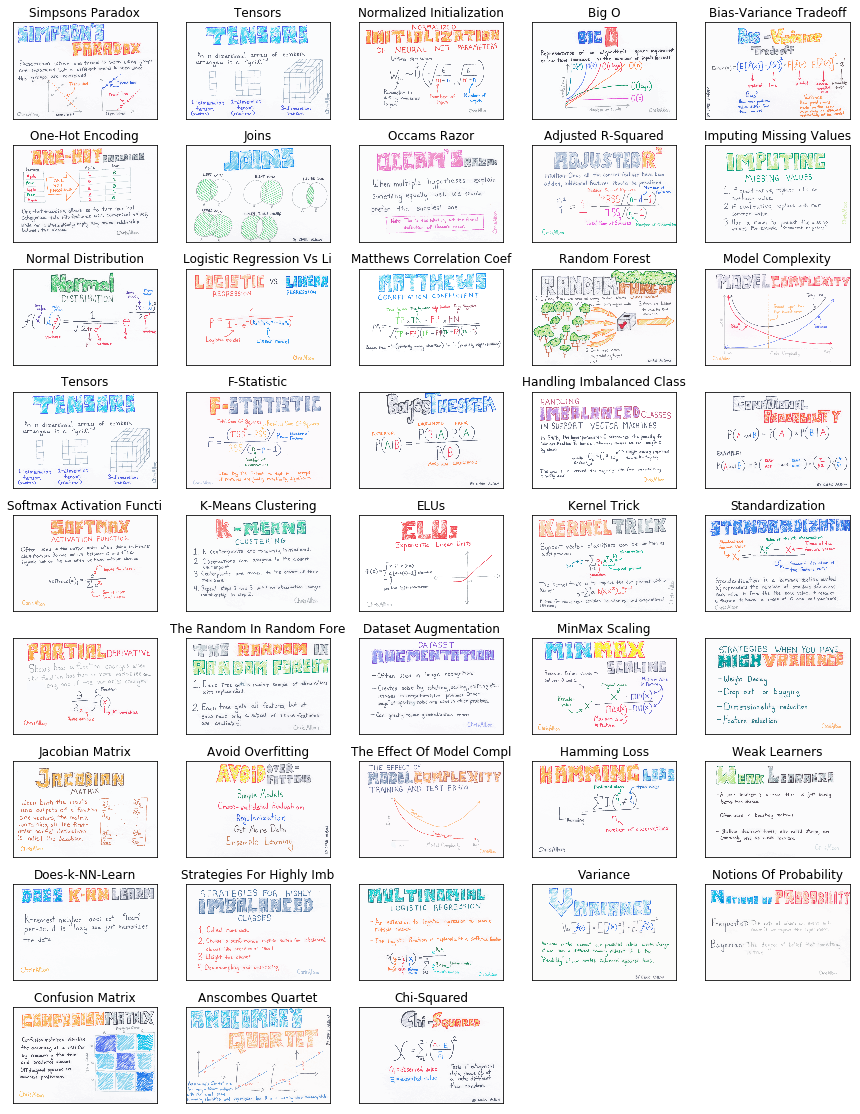

In [61]:
# most important (liked) tweet
# this is either well done and something which people liked or it is important
plot_images(df_likes_80.img_name.values, df_likes_80.text.values,  size=(15, 20))